In [24]:
# %% init
import numpy
import matplotlib
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

(672, 182)


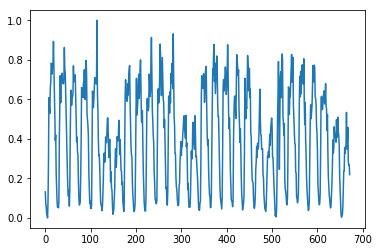

In [19]:
# %% load dataset: 182 base stations, 4 weeks, hourly traffic
feature_size = 182
time_steps = 24
dataset = numpy.fromfile(open('../data/traffic.bin', 'rb'),
                         dtype=numpy.float64).reshape(feature_size, time_steps * 7 * 4)
dataset = dataset.transpose()
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print dataset.shape
pyplot.plot(dataset[:, 10])
pyplot.show()

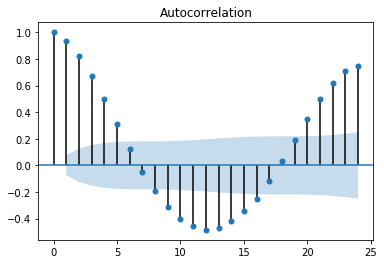

(504,) (168,)
0
24
48
72
96
120
144
Test MAE: 0.175


In [21]:
# %% auto correlation
feature_id = 153
X = dataset[:, feature_id]
plot_acf(X, lags=24)
pyplot.show()

size = 24 * 7 * 3
train, test = X[:size], X[size:len(X)]
print train.shape, test.shape
predictions = numpy.zeros(24 * 7)
for t in range(0, len(test), 24):
    print t
    model = ARIMA(train, order=(6, 0, 1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(24)
    yhat = output[0]
    predictions[t:t + 24] = yhat
    obs = test[t:t + 24]
    train = numpy.append(train, obs)
error = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % error)

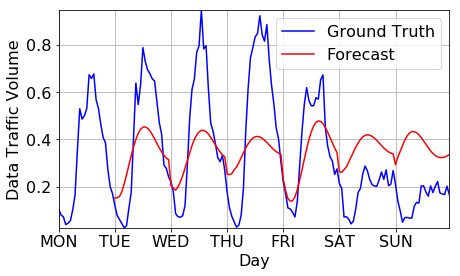

In [31]:
WEEKDAYS = ['MON','TUE','WED','THU','FRI','SAT','SUN']
fig = pyplot.figure(figsize=[7, 4])
matplotlib.rc('font', size=16)
pyplot.plot(test, 'b', label='Ground Truth')
test_size = test.shape[0]
data = numpy.empty(test_size)
data[time_steps:] = predictions[time_steps:]
data[:time_steps] = numpy.nan
pyplot.plot(data, 'r', label='Forecast')
pyplot.xlabel('Day')
pyplot.xticks(numpy.arange(0, 24*7, 24),WEEKDAYS)
pyplot.ylabel('Data Traffic Volume')
pyplot.ylim([0, 1])
pyplot.legend()
pyplot.grid()
pyplot.autoscale(tight=True)
pyplot.show()